# Combined data processing

In [1]:
import requests
import pandas as pd
import numpy as np

In [2]:
columns = ["name", "company", "rating", "number_votes", "top notes", "middle notes", "base notes"]

In [3]:
data = pd.read_csv('data.csv', names = columns, sep=';', header = None)
data.drop([0], inplace = True)
data.reset_index(drop = True, inplace = True)

In [4]:
data['rating'].replace(to_replace = ",", value = ".", regex = True, inplace = True)
data['number_votes'].replace(to_replace = ",", value = "", regex = True, inplace = True)

In [5]:
data['rating'] = pd.to_numeric(data['rating']).round(2)
data['number_votes'] = pd.to_numeric(data['number_votes'])

In [6]:
data["rating"].replace("","NaN", inplace = True)

In [7]:
data.dropna(inplace = True)
data.shape

(4816, 7)

In [8]:
data.drop_duplicates(subset=None, keep="first", inplace = True, ignore_index = True)
data.head(20)

,name,company,rating,number_votes,top notes,middle notes,base notes
0,Angels' Share,By Kilian,4.31,682.0,['Cognac'],"['Cinnamon', 'Tonka Bean', 'Oak']","['Praline', 'Vanilla', 'Sandalwood']"
1,My Way,Giorgio Armani,3.57,1471.0,"['Orange Blossom', 'Bergamot']","['Tuberose', 'Indian Jasmine']","['White Musk', 'Madagascar Vanilla', 'Virginia..."
2,Libre Intense,Yves Saint Laurent,4.02,858.0,"['Lavender', 'Mandarin Orange', 'Bergamot']","['Lavender', 'Tunisian Orange Blossom', 'Jasmi...","['Madagascar Vanilla', 'Tonka Bean', 'Ambergri..."
3,Dior Homme 2020,Christian Dior,3.42,1402.0,"['Bergamot', 'Pink Pepper', 'elemi']","['Cashmere Wood', 'Atlas Cedar', 'Patchouli']","['Iso E Super', 'Haitian Vetiver', 'White Musk']"
4,Acqua di Giò Profondo,Giorgio Armani,4.03,869.0,"['Sea Notes', 'Aquozone', 'Bergamot', 'Green M...","['Rosemary', 'Cypress', 'Lavender', 'Mastic or...","['Mineral notes', 'Musk', 'Patchouli', 'Amber']"
5,Le Male Le Parfum,Jean Paul Gaultier,4.26,690.0,['Cardamom'],"['Lavender', 'iris']","['Vanilla', 'Oriental notes', 'Woodsy Notes']"
6,Beau De Jour Eau de Parfum,Tom Ford,4.25,729.0,"['Lavender Extract', 'Lavender']","['Rosemary', 'Oakmoss', 'Mint', 'Basil', 'Gera...","['Patchouli', 'Amber']"
7,Angel Nova,Mugler,3.54,814.0,"['Raspberry', 'Litchi']",['Damask Rose'],"['Akigalawood', 'Benzoin']"
8,L'Interdit Eau de Parfum Intense,Givenchy,4.08,596.0,['Black Pepper'],"['Tuberose', 'Sesame', 'Orange Blossom']","['Madagascar Vanilla', 'Patchouli', 'Vetiver']"
9,L'Homme Idéal Extrême,Guerlain,4.38,434.0,"['Almond', 'Pink Pepper', 'Bergamot']","['Plum', 'Cinnamon', 'Heliotrope']","['Tobacco', 'Leather', 'Patchouli', 'Cedar']"


In [9]:
data.rating.sort_values()

1653    1.0
549     2.0
596     2.0
3921    2.0
478     2.0
       ... 
750     5.0
1039    5.0
3913    5.0
1554    5.0
1646    5.0
Name: rating, Length: 3933, dtype: float64

In [10]:
data.loc[549]

name                                         Eau Nouvelle
company                                       Jean Dessès
rating                                                2.0
number_votes                                          1.0
top notes       ['Honeysuckle', 'Lily-of-the-', 'Valley']
middle notes               ['Hyacinth', 'Green', 'Notes']
base notes             ['Palisander', 'Rosewood', 'Musk']
Name: 549, dtype: object

In [11]:
data['base notes'][1646]

"['Vetiver', 'Labdanum', 'Patchouli', 'Benzoin', 'Tonka', 'Bean']"

In [12]:
# Convert rating and number_votes into floats / integers
result = data.dtypes
result

name             object
company          object
rating          float64
number_votes    float64
top notes        object
middle notes     object
base notes       object
dtype: object

array([[<AxesSubplot:title={'center':'number_votes'}>]], dtype=object)

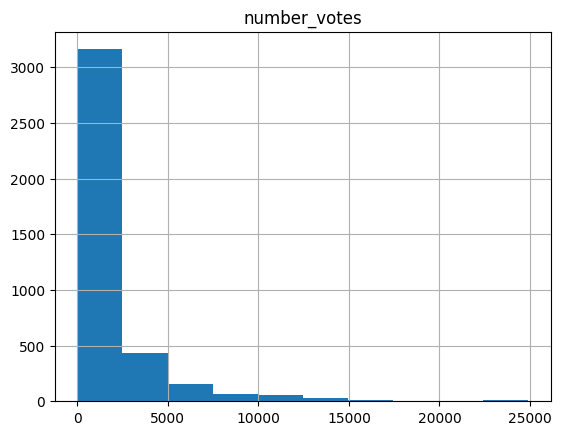

In [13]:
# Distribution of the number_votes
data.hist(column='number_votes')

array([[<AxesSubplot:title={'center':'number_votes'}>]], dtype=object)

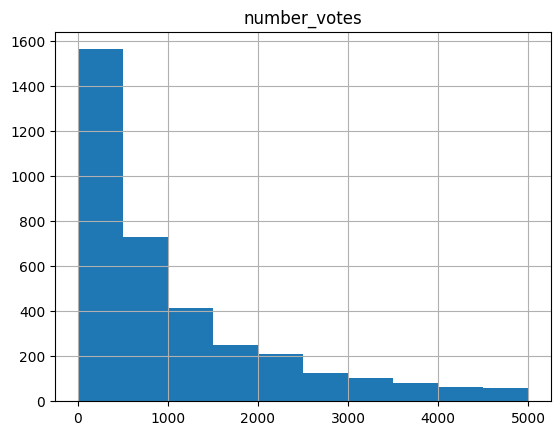

In [14]:
data.hist(column='number_votes', range = (0,5000))

In [15]:
# Count the number of perfumes per brand
data['company'].value_counts(dropna=False)

Guerlain                 113
Dior                      94
Chanel                    89
Yves Saint Laurent        62
Giorgio Armani            62
                        ... 
Ferrari                    1
Jean Charles Brosseau      1
Demeter Fragrance          1
Tartine et Chocolat        1
Walter Wolf                1
Name: company, Length: 564, dtype: int64

In [16]:
# Overview of the dataset
data['number_votes'].sum()

6799643.0

In [17]:
data["top notes"] = data["top notes"].str.replace(r"[\"\']", "").str.replace("[","").str.replace("]","")
data["middle notes"] = data["middle notes"].str.replace(r"[\"\']", "").str.replace("[","").str.replace("]","")
data["base notes"] = data["base notes"].str.replace(r"[\"\']", "").str.replace("[","").str.replace("]","")
data["top notes"] = data["top notes"].apply(lambda line: line.split(","))
data["middle notes"] = data["middle notes"].apply(lambda line: line.split(","))
data["base notes"] = data["base notes"].apply(lambda line: line.split(","))

/var/folders/1q/wx08gl052gg_whss5gcklmtr0000gn/T/ipykernel_26136/224193425.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data["top notes"] = data["top notes"].str.replace(r"[\"\']", "").str.replace("[","").str.replace("]","")
/var/folders/1q/wx08gl052gg_whss5gcklmtr0000gn/T/ipykernel_26136/224193425.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["top notes"] = data["top notes"].str.replace(r"[\"\']", "").str.replace("[","").str.replace("]","")
/var/folders/1q/wx08gl052gg_whss5gcklmtr0000gn/T/ipykernel_26136/224193425.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data["middle notes"] = data["middle notes"].str.replace(r"[\"\']", "").str.replace("[","").str.replace("]","")
/var/folders/1q/wx08gl052gg_whss5gcklmtr

# List olfactory notes

## List of top notes

In [18]:
list_of_list_top_notes = data["top notes"].tolist()

In [19]:
list_top_notes = [item for sublist in list_of_list_top_notes for item in sublist]
list_top_notes = list(dict.fromkeys(list_top_notes))
list_top_notes

['Cognac',
 'Orange Blossom',
 ' Bergamot',
 'Lavender',
 ' Mandarin Orange',
 'Bergamot',
 ' Pink Pepper',
 ' elemi',
 'Sea Notes',
 ' Aquozone',
 ' Green Mandarin',
 'Cardamom',
 'Lavender Extract',
 ' Lavender',
 'Raspberry',
 ' Litchi',
 'Black Pepper',
 'Almond',
 'Peach',
 ' Blood Orange',
 ' Cardamom',
 ' Heliotrope',
 'Frangipani',
 ' Ylang-Ylang',
 ' White Flowers',
 'Neroli',
 ' Green Apple',
 ' Italian Mandarin',
 'Truffle',
 ' Plum',
 'Geranium',
 '',
 'Mandarin Orange',
 ' Ginger',
 'Lemon',
 'Pear',
 ' Ambrette (Musk Mallow)',
 'Sichuan Pepper',
 ' Turmeric',
 'Bitter Orange',
 'Mint',
 ' Candy Apple',
 ' Lemon',
 'Mirabelle',
 'Violet Leaf',
 ' Rosemary',
 'Blood Orange',
 'Zefir',
 ' Caramel',
 ' Fig',
 ' Salt',
 ' Quince',
 'Ylang-Ylang',
 ' Spices',
 ' Thyme',
 'Plum',
 ' Wild berries',
 ' Coriander',
 ' Anise',
 ' Brazilian Rosewood',
 'Grapefruit',
 'Wild Strawberry',
 ' Citruses',
 ' Grapefruit',
 'Red Fruits',
 ' Blackberry',
 ' Ozonic notes',
 ' Sour Cherry',
 ' 

In [20]:
# Number of top notes
len(list_top_notes)

913

## List of middle notes

In [21]:
#Create list of middle notes (as columns)
list_of_list_middle_notes = data['middle notes'].tolist()

In [22]:
list_middle_notes = [item for sublist in list_of_list_middle_notes for item in sublist]
list_middle_notes = list(dict.fromkeys(list_middle_notes))
list_middle_notes

['Cinnamon',
 ' Tonka Bean',
 ' Oak',
 'Tuberose',
 ' Indian Jasmine',
 'Lavender',
 ' Tunisian Orange Blossom',
 ' Jasmine Sambac',
 ' Orchid',
 'Cashmere Wood',
 ' Atlas Cedar',
 ' Patchouli',
 'Rosemary',
 ' Cypress',
 ' Lavender',
 ' Mastic or Lentisque',
 ' iris',
 ' Oakmoss',
 ' Mint',
 ' Basil',
 ' Geranium',
 'Damask Rose',
 ' Sesame',
 ' Orange Blossom',
 'Plum',
 ' Cinnamon',
 ' Heliotrope',
 'Rum',
 ' Cognac',
 ' Davana',
 ' Jasmine',
 'Musk',
 ' Amber',
 'Rose',
 'Jasmine',
 ' Coconut',
 'Ylang-Ylang',
 ' Rum',
 ' Black Orchid',
 'Heliotrope',
 'Grasse Rose',
 ' Damask Rose',
 ' Monoi Oil',
 ' Salt',
 ' Ambergris',
 ' Solar notes',
 ' Leather',
 ' Cashmeran',
 ' Pine',
 ' Labdanum',
 'Orange Blossom',
 ' Gardenia',
 'Labdanum',
 'May Rose',
 ' Bulgarian Rose',
 ' Turkish Rose',
 'Raspberry',
 ' Tuberose',
 ' Milk',
 'Turkish Rose',
 ' Grasse Rose',
 ' Egyptian Jasmine',
 ' Musk',
 'Sandalwood',
 ' Liquor',
 ' Balsam Fir',
 ' Benzoin',
 ' Ambrocenide',
 ' Indonesian Patchoul

In [23]:
# Number of middle notes
len(list_middle_notes)

1146

## List of base notes

In [24]:
#Create dataframe base notes (as columns)
list_of_list_base_notes = data['base notes'].tolist()

In [25]:
list_base_notes = [item for sublist in list_of_list_base_notes for item in sublist]
list_base_notes = list(dict.fromkeys(list_base_notes))
list_base_notes

['Praline',
 ' Vanilla',
 ' Sandalwood',
 'White Musk',
 ' Madagascar Vanilla',
 ' Virginian Cedar',
 'Madagascar Vanilla',
 ' Tonka Bean',
 ' Ambergris',
 ' Vetiver',
 'Iso E Super',
 ' Haitian Vetiver',
 ' White Musk',
 'Mineral notes',
 ' Musk',
 ' Patchouli',
 ' Amber',
 'Vanilla',
 ' Oriental notes',
 ' Woodsy Notes',
 'Patchouli',
 'Akigalawood',
 ' Benzoin',
 'Tobacco',
 ' Leather',
 ' Cedar',
 'Indonesian Patchouli Leaf',
 ' Cashmeran',
 ' Labdanum',
 ' Styrax',
 'Cashmeran',
 'Coconut',
 ' Vanila',
 ' Cashmere Wood',
 ' iris',
 '',
 ' Oakmoss',
 'Musk',
 ' Virginia Cedar',
 'Acácia',
 ' Bitter Orange',
 'Sandalwood',
 'Leather',
 ' Agarwood (Oud)',
 'Tonka Bean',
 'Benzoin',
 ' French labdanum',
 'Vanille',
 ' Heliotrope',
 'Oakmoss',
 'Ambroxan',
 'Amberwood',
 'Honey',
 ' Orris Root',
 ' Woody Notes',
 ' Peru Balsam',
 ' Cinnamon',
 ' Cloves',
 'Amber',
 ' Moss',
 ' Ambroxan',
 ' Olibanum',
 ' Amberwood',
 ' Cypress',
 ' Iso E Super',
 ' White Cedar Extract',
 'Caramel',
 'B

In [26]:
# Number of base_notes
len(list_base_notes)

782

# Creation of encoded dataframe

## Encoded dataframe (topnotes)

In [27]:
data.reset_index(inplace=True)

In [28]:
data_1 = data.copy()

In [29]:
data_encoded_top_notes = data_1["top notes"].str.join('|').str.get_dummies()
extracted_col = data_1["name"]  
data_encoded_top_notes.insert(0, "name", extracted_col)
data_encoded_top_notes.columns = [str(col) + '_top' for col in data_encoded_top_notes.columns]
data_encoded_top_notes.drop(data_encoded_top_notes.iloc[:,1:2], axis = 1, inplace = True)
data_encoded_top_notes#.set_index('name_top', inplace = True)


,name_top,(olibanum)_top,Absinthe_top,Absolute_top,Accord_top,African_top,African Orange flower_top,Agarwood_top,Agarwood (Oud)_top,Agave_top,...,Yuzu_top,Zefir_top,cannabis_top,citruses_top,gunpowder_top,iris_top,plum_top,tincture_top,violet_top,white_top
0,Angels' Share,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,My Way,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Libre Intense,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Dior Homme 2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Acqua di Giò Profondo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,Yatagan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3929,L'Eau Trois Eau de Toilette,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3930,Un Homme,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3931,Mure et Musc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
list_top_demo = list(data_encoded_top_notes.columns.values[1:])
list_top_demo = [list_top_demo[i] for i in range(len(list_top_demo))]
list_top_demo 

[' (olibanum)_top',
 ' Absinthe_top',
 ' Absolute_top',
 ' Accord_top',
 ' African_top',
 ' African Orange flower_top',
 ' Agarwood_top',
 ' Agarwood (Oud)_top',
 ' Agave_top',
 ' Air_top',
 ' Aldehydes_top',
 ' Allspice_top',
 ' Almond_top',
 ' Aloe_top',
 ' Amalfi_top',
 ' Amalfi Lemon_top',
 ' Amaretto_top',
 ' Amber_top',
 ' Ambrette_top',
 ' Ambrette (Musk Mallow)_top',
 ' Amyl_top',
 ' Amyris_top',
 ' Angelica_top',
 ' Anise_top',
 ' Apple_top',
 ' Apricot_top',
 ' Aquozone_top',
 ' Artemisia_top',
 ' Asafoetida_top',
 ' Balsam_top',
 ' Bamboo_top',
 ' Banana_top',
 ' Bark_top',
 ' Basil_top',
 ' Basilwatercress_top',
 ' Bay_top',
 ' Bay Leaf_top',
 ' Bean_top',
 ' Beans_top',
 ' Bellflower_top',
 ' Benzoin_top',
 ' Bergamot_top',
 ' Bergamotelemi_top',
 ' Berries_top',
 ' Berry_top',
 ' Betel_top',
 ' Big_top',
 ' Big Strawberry_top',
 ' Birch_top',
 ' Bitter_top',
 ' Bitter Almond_top',
 ' Bitter Orange_top',
 ' Black_top',
 ' Black Cardamom_top',
 ' Black Currant_top',
 ' Blac

In [31]:
# Check if elements exist in DataFrame
if 1 in data_encoded_top_notes.values:
    print('Element exists in Dataframe')
else: 
    print(('Element does not exist in Dataframe'))

Element exists in Dataframe


In [32]:
# Total number of top notes
num_top_notes = len(data_encoded_top_notes.columns)
num_top_notes 

912

## Encoded dataframe (middlenotes)

In [33]:
data_2 = data.copy()

data_encoded_middle_notes = data_2["middle notes"].str.join('|').str.get_dummies()
extracted_col = data_2["name"]
data_encoded_middle_notes.insert(0, "name", extracted_col)
data_encoded_middle_notes.columns = [str(col) + '_middle' for col in data_encoded_middle_notes.columns]
data_encoded_middle_notes.drop(data_encoded_middle_notes.iloc[:,1:2], axis = 1, inplace = True)
data_encoded_middle_notes

,name_middle,Absolute_middle,Acácia_middle,African_middle,African Geranium_middle,African Orange flower_middle,Agarwood_middle,Agarwood (Oud)_middle,Agave_middle,Aldehydes_middle,...,iris_middle,oak_middle,oak moss_middle,pink_middle,pink tulip_middle,resins_middle,tincture_middle,vetyver_middle,white_middle,white honey_middle
0,Angels' Share,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,My Way,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Libre Intense,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Dior Homme 2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Acqua di Giò Profondo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,Yatagan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3929,L'Eau Trois Eau de Toilette,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3930,Un Homme,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3931,Mure et Musc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Check if elements exist in DataFrame
if 1 in data_encoded_middle_notes.values:
    print('Element exists in Dataframe')
else: 
    print(('Element does not exist in Dataframe'))

Element exists in Dataframe


In [35]:
list_middle_demo = list(data_encoded_middle_notes.columns.values[1:])
list_middle_demo = [list_middle_demo[i] for i in range(len(list_middle_demo))]
list_middle_demo 

[' Absolute_middle',
 ' Acácia_middle',
 ' African_middle',
 ' African Geranium_middle',
 ' African Orange flower_middle',
 ' Agarwood_middle',
 ' Agarwood (Oud)_middle',
 ' Agave_middle',
 ' Aldehydes_middle',
 ' Allspice_middle',
 ' Almond_middle',
 ' Almond Blossom_middle',
 ' Amalfi_middle',
 ' Amalfi Lemon_middle',
 ' Amaryllis_middle',
 ' Amber_middle',
 ' Ambergris_middle',
 ' Amberwood_middle',
 ' Ambrette_middle',
 ' Ambrette (Musk Mallow)_middle',
 ' Ambrocenide_middle',
 ' Ambroxan_middle',
 ' Amyl_middle',
 ' Amyl Salicylate_middle',
 ' Amyris_middle',
 ' Angelica_middle',
 ' Anise_middle',
 ' Apple_middle',
 ' Apple Blossom_middle',
 ' Apricot_middle',
 ' Artemisia_middle',
 ' Arum_middle',
 ' Arum Lily_middle',
 ' Atlas_middle',
 ' Atlas Cedar_middle',
 ' Balsam_middle',
 ' Balsam Fir_middle',
 ' Bamboo_middle',
 ' Banana_middle',
 ' Bark_middle',
 ' Basil_middle',
 ' Basmati_middle',
 ' Bay_middle',
 ' Bay Leaf_middle',
 ' Bean_middle',
 ' Beans_middle',
 ' Beeswax_middl

In [36]:
# Total number of middle notes
num_middle_notes = len(data_encoded_middle_notes.columns)
num_middle_notes 

1145

## Encoded dataframe (basenotes)

In [37]:
data_3 = data.copy()

data_encoded_base_notes = data_3["base notes"].str.join('|').str.get_dummies()
extracted_col = data_3["name"]  
data_encoded_base_notes.insert(0, "name", extracted_col)
data_encoded_base_notes.columns = [str(col) + '_base' for col in data_encoded_base_notes .columns]
data_encoded_base_notes.drop(data_encoded_base_notes.iloc[:,1:2], axis = 1, inplace = True)
data_encoded_base_notes

,name_base,(olibanum)_base,Absolute_base,Accord_base,Acácia_base,Agarwood_base,Agarwood (Oud)_base,Akigalawood_base,Aldehydes_base,Almond_base,...,heather_base,iris_base,oak_base,resins_base,resinsebony_base,tincture_base,vanilla_base,vetyver_base,white_base,white honey_base
0,Angels' Share,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,My Way,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Libre Intense,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Dior Homme 2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Acqua di Giò Profondo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,Yatagan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3929,L'Eau Trois Eau de Toilette,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3930,Un Homme,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3931,Mure et Musc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Check if elements exist in DataFrame
if 1 in data_encoded_top_notes.values:
    print('Element exists in Dataframe')
else: 
    print(('Element does not exist in Dataframe'))

Element exists in Dataframe


In [39]:
# Total number of base notes
num_base_notes = len(data_encoded_base_notes.columns)
num_base_notes 

781

In [40]:
list_base_demo = list(data_encoded_base_notes.columns.values[1:])
list_base_demo = [list_base_demo[i] for i in range(len(list_base_demo))]
list_base_demo 

[' (olibanum)_base',
 ' Absolute_base',
 ' Accord_base',
 ' Acácia_base',
 ' Agarwood_base',
 ' Agarwood (Oud)_base',
 ' Akigalawood_base',
 ' Aldehydes_base',
 ' Almond_base',
 ' Almond Milk_base',
 ' Amber_base',
 ' Ambergris_base',
 ' Amberiris_base',
 ' Amberoak_base',
 ' Amberresins_base',
 ' Ambersycamore_base',
 ' Ambervetyver_base',
 ' Amberwood_base',
 ' Ambrette_base',
 ' Ambrette (Musk Mallow)_base',
 ' Ambrettolide_base',
 ' Ambroxan_base',
 ' Amyris_base',
 ' Angelica_base',
 ' Animal_base',
 ' Anise_base',
 ' Apple_base',
 ' Apricot_base',
 ' Atlas_base',
 ' Australian_base',
 ' Australian Sandalwood_base',
 ' Balm_base',
 ' Balsam_base',
 ' Balsamic_base',
 ' Balsamvetyver_base',
 ' Bamboo_base',
 ' Barley_base',
 ' Basil_base',
 ' Bean_base',
 ' Beaniris_base',
 ' Beanirisoak_base',
 ' Beanresins_base',
 ' Beans_base',
 ' Beeswax_base',
 ' Benzoin_base',
 ' Benzoinoak_base',
 ' Berries_base',
 ' Berry_base',
 ' Birch_base',
 ' Bitter_base',
 ' Bitter Orange_base',
 ' Bl

## Encoded dataframe final (top + middle + base notes) (BINARY LABEL)

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

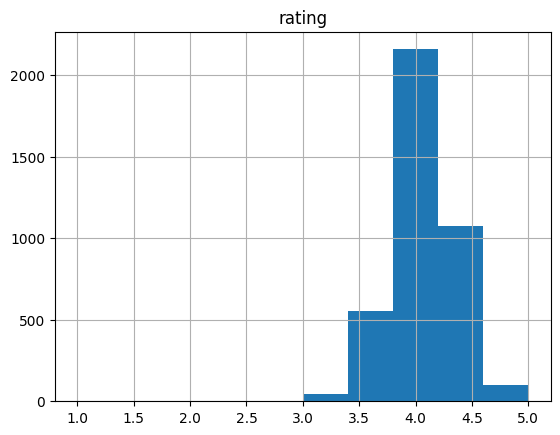

In [41]:
data.hist(column = "rating")

In [42]:
data['rating'].min()

1.0

In [43]:
data.rating.median()

4.06

In [44]:
# Labels the data_encoded by order of importance
data_encoded_middle_notes_label = data_encoded_middle_notes.replace(1,0.7)
data_encoded_top_notes_label = data_encoded_top_notes.replace(1,0.2)
data_encoded_base_notes_label = data_encoded_base_notes.replace(1,0.1)

In [45]:
# created temp dataframe to compare to clean new dataframe with joined duplicate columns
data_final = pd.concat([data_encoded_top_notes_label, data_encoded_middle_notes_label, data_encoded_base_notes_label],axis=1)
data_bin_label_temp = data_final.drop(['name_middle', 'name_base'], axis=1)
data_bin_label_temp = data_bin_label_temp.rename(columns={"name_top": "name"}, errors="raise")

extracted_col_rating = data["rating"]
data_bin_label_temp.insert(2836,"rating", extracted_col_rating)

# Transform rating binary
data_bin_label_temp["rating"] = data_bin_label_temp["rating"].apply(lambda x : 0 if x <= 4 else 1)
data_bin_label_temp.loc[3650]

name                Paco Rabanne Pour Homme
 (olibanum)_top                         0.0
 Absinthe_top                           0.0
 Absolute_top                           0.0
 Accord_top                             0.0
                             ...           
vanilla_base                            0.0
vetyver_base                            0.0
white_base                              0.0
white honey_base                        0.0
rating                                    0
Name: 3650, Length: 2837, dtype: object

In [46]:
# create list of all notes in dataframe
list_final_data = list(data_bin_label_temp)
list_final_data

['name',
 ' (olibanum)_top',
 ' Absinthe_top',
 ' Absolute_top',
 ' Accord_top',
 ' African_top',
 ' African Orange flower_top',
 ' Agarwood_top',
 ' Agarwood (Oud)_top',
 ' Agave_top',
 ' Air_top',
 ' Aldehydes_top',
 ' Allspice_top',
 ' Almond_top',
 ' Aloe_top',
 ' Amalfi_top',
 ' Amalfi Lemon_top',
 ' Amaretto_top',
 ' Amber_top',
 ' Ambrette_top',
 ' Ambrette (Musk Mallow)_top',
 ' Amyl_top',
 ' Amyris_top',
 ' Angelica_top',
 ' Anise_top',
 ' Apple_top',
 ' Apricot_top',
 ' Aquozone_top',
 ' Artemisia_top',
 ' Asafoetida_top',
 ' Balsam_top',
 ' Bamboo_top',
 ' Banana_top',
 ' Bark_top',
 ' Basil_top',
 ' Basilwatercress_top',
 ' Bay_top',
 ' Bay Leaf_top',
 ' Bean_top',
 ' Beans_top',
 ' Bellflower_top',
 ' Benzoin_top',
 ' Bergamot_top',
 ' Bergamotelemi_top',
 ' Berries_top',
 ' Berry_top',
 ' Betel_top',
 ' Big_top',
 ' Big Strawberry_top',
 ' Birch_top',
 ' Bitter_top',
 ' Bitter Almond_top',
 ' Bitter Orange_top',
 ' Black_top',
 ' Black Cardamom_top',
 ' Black Currant_top'

In [47]:
# copy df to get final data_bin_label
data_bin_label = data_bin_label_temp.copy()

# clean dataframe
column_names = []

for i in list_final_data:
        w = i.replace( ')', '').replace('(','').strip().capitalize()
        
        column_names.append(w)

# change column names to clean names
data_bin_label.columns = column_names

# group together dupliucate rows and drop duplicates
data_bin_label = data_bin_label.groupby(data_bin_label.columns, axis = 1).sum()
data_bin_label.drop(columns = 'Name', inplace = True)
data_bin_label.drop_duplicates(inplace=True)

data_bin_label

,Absinthe_top,Absolute_base,Absolute_middle,Absolute_top,Accord_base,Accord_middle,Accord_top,Acetate_top,Acácia_base,Acácia_middle,...,Ylang_middle,Ylang_top,Ylangelemi_middle,Ylangiris_middle,Ylangiris_top,Ylangtincture_top,Yuzu_middle,Yuzu_top,Zefir_top,Zest_top
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# rename fucking olibanum
data_bin_label.rename(columns={'(olibanum)_top':'Olibanum_top' } ,inplace=True)

In [49]:
# create rating column
extracted_col_rating = data["rating"]
data_bin_label.insert(0,"rating", extracted_col_rating)

# Transform rating binary
data_bin_label["rating"] = data_bin_label["rating"].apply(lambda x : 0 if x <= 4.3 else 1)
data_bin_label

## maybe change number to increase number of unsuccessful perfumes

,rating,Absinthe_top,Absolute_base,Absolute_middle,Absolute_top,Accord_base,Accord_middle,Accord_top,Acetate_top,Acácia_base,...,Ylang_middle,Ylang_top,Ylangelemi_middle,Ylangiris_middle,Ylangiris_top,Ylangtincture_top,Yuzu_middle,Yuzu_top,Zefir_top,Zest_top
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3929,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3930,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3931,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# create new lists containing cleaned column names
top_demo = []
middle_demo = []
base_demo = []

for i in list(data_bin_label):
    if '_top' in i:
        top_demo.append(i)
    elif '_middle' in i:
        middle_demo.append(i)
    elif '_base' in i:
        base_demo.append(i)

# save as csv to export
np.savetxt("top_demo.csv", top_demo, delimiter=", ", fmt="% s")
np.savetxt("middle_demo.csv", middle_demo, delimiter=", ", fmt="% s")
np.savetxt("base_demo.csv", base_demo, delimiter=", ", fmt="% s")

In [51]:
print('top: ', len(top_demo), 'middle: ', len(middle_demo), 'base: ', len(base_demo),
      'total: ' , (len(top_demo) + len(middle_demo) + len(base_demo)))

top:  619 middle:  787 base:  529 total:  1935


In [52]:
# Check if elements exist in DataFrame
if 0.7 in data_bin_label.values:
    print('Element exists in Dataframe')
else: 
    print(('Element does not exist in Dataframe'))

Element exists in Dataframe


In [53]:
# Check if elements exist in DataFrame
if 0.2 in data_bin_label.values:
    print('Element exists in Dataframe')
else: 
    print(('Element does not exist in Dataframe'))

Element exists in Dataframe


In [54]:
# Check if elements exist in DataFrame
if 0.1 in data_bin_label.values:
    print('Element exists in Dataframe')
else: 
    print(('Element does not exist in Dataframe'))

Element exists in Dataframe


In [55]:
# Check if elements exist in DataFrame
if 1 in data_bin_label.values:
    print('Element exists in Dataframe')
else: 
    print(('Element does not exist in Dataframe'))

Element exists in Dataframe


In [56]:
# Create the data label bin csv file
import os  
os.makedirs('/Users/philine/code/thibaultdiers/project_fragrance/website_perfume', exist_ok=True)  
data_bin_label.to_csv('/Users/philine/code/thibaultdiers/project_fragrance/website_perfume/data_bin_label.csv',index=False)

In [57]:
# saves original lists as csv (don't use this for website)
np.savetxt("../website_perfume/list_base_demo.csv", list_base_demo, delimiter=", ", fmt="% s")
np.savetxt("../website_perfume/list_top_demo.csv", list_top_demo, delimiter=", ", fmt="% s")
np.savetxt("../website_perfume/list_middle_demo.csv", list_middle_demo, delimiter=", ", fmt="% s")